In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022.h5ad")

In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/figures/"

In [4]:
def update_celltype(x):
    if x["celltype"] == "Eps/Delta progenitors":
        return "Epsilon prog."
    return x["celltype"]
adata.obs["celltype_adapted"] = adata.obs.apply(update_celltype, axis=1)

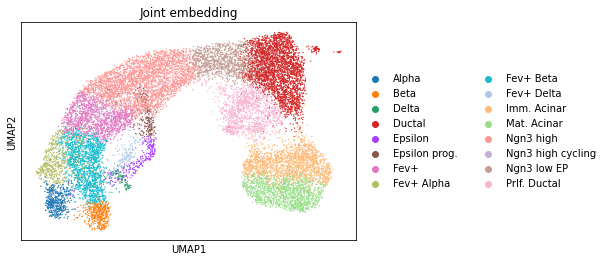

In [5]:
fig = sc.pl.embedding(adata, basis="umap", color=["celltype_adapted"], title="Joint embedding", show=False, return_fig=False)

In [6]:
fig.figure.savefig(os.path.join(output_dir, 'joint_embedding.png'))

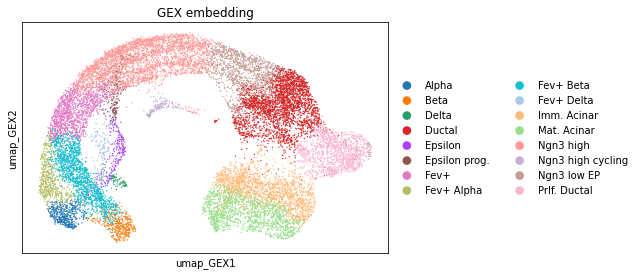

In [7]:
fig = sc.pl.scatter(adata, basis="umap_GEX", color=["celltype_adapted"], title="GEX embedding", show=False)

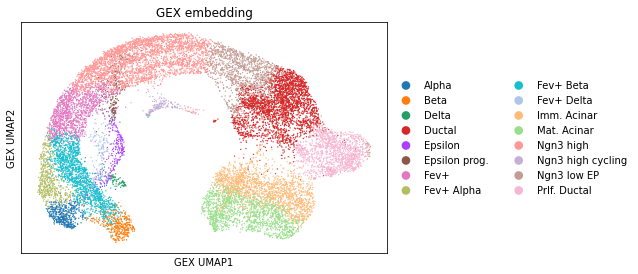

In [8]:
fig.set_xlabel("GEX UMAP1")
fig.set_ylabel("GEX UMAP2")
fig.figure

In [9]:
fig.figure.savefig(os.path.join(output_dir, 'gex_embedding.png'))

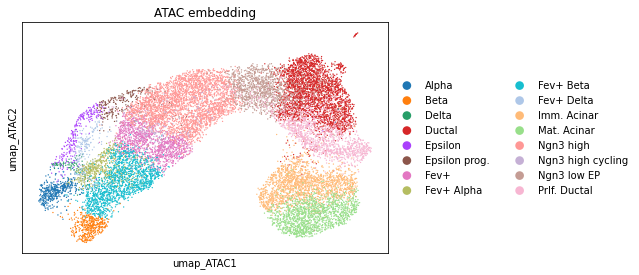

In [19]:
fig = sc.pl.scatter(adata, basis="umap_ATAC", color=["celltype_adapted"], title="ATAC embedding", show=False)

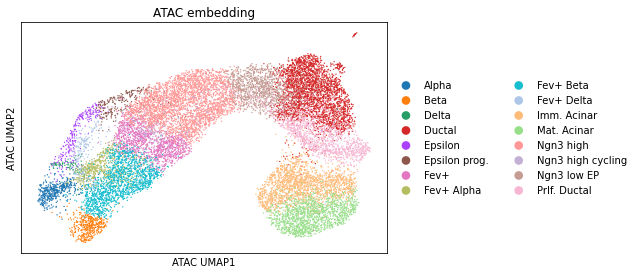

In [20]:
fig.set_xlabel("ATAC UMAP1")
fig.set_ylabel("ATAC UMAP2")
fig.figure

In [12]:
fig.figure.savefig(os.path.join(output_dir, 'ATAC_embedding.png'))

In [ ]:
label_params = fig.get_legend_handles_labels() 

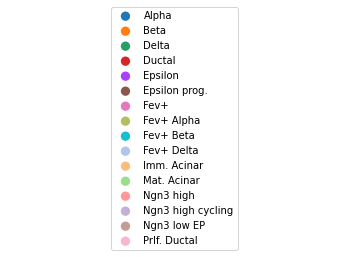

In [30]:
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=7, bbox_to_anchor=(0.5, 0.5), prop={"size":10})


In [31]:
axl.figure.savefig(os.path.join(output_dir, 'legend_only.png'))

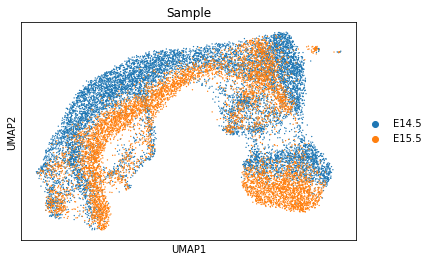

In [13]:
fig = sc.pl.umap(adata, color=["sample"], title="Sample", show=False)

In [14]:
fig.figure.savefig(os.path.join(output_dir, 'per_sample_embedding.png'))

In [33]:
adata.obs["sample"].value_counts()

E14.5    9832
E15.5    7121
Name: sample, dtype: int64

In [35]:
adata.uns["celltype_colors"]

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2'], dtype=object)

In [36]:
dict(zip(adata.obs['celltype'].cat.categories, adata.uns['celltype_colors']))

{'Alpha': '#1f77b4',
 'Beta': '#ff7f0e',
 'Delta': '#279e68',
 'Ductal': '#d62728',
 'Eps/Delta progenitors': '#aa40fc',
 'Epsilon': '#8c564b',
 'Fev+': '#e377c2',
 'Fev+ Alpha': '#b5bd61',
 'Fev+ Beta': '#17becf',
 'Fev+ Delta': '#aec7e8',
 'Imm. Acinar': '#ffbb78',
 'Mat. Acinar': '#98df8a',
 'Ngn3 high': '#ff9896',
 'Ngn3 high cycling': '#c5b0d5',
 'Ngn3 low EP': '#c49c94',
 'Prlf. Ductal': '#f7b6d2'}